<a href="https://colab.research.google.com/github/Jpsama1236/ML_algorithms/blob/main/poly_Log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/content/ushape.csv',names=['X','Y','class'])

In [7]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [8]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [14]:
X

array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.91980633,

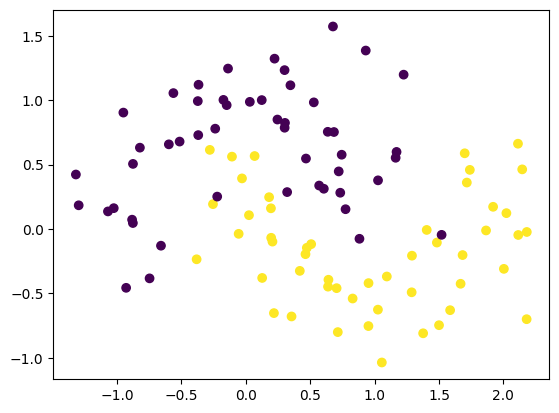

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [11]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

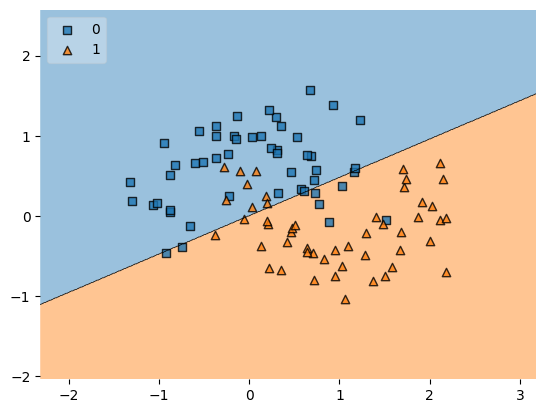

In [15]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [16]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.8300000000000001

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)
X_trf=poly.fit_transform(X)

In [18]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9

In [27]:
def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf,y)

    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))


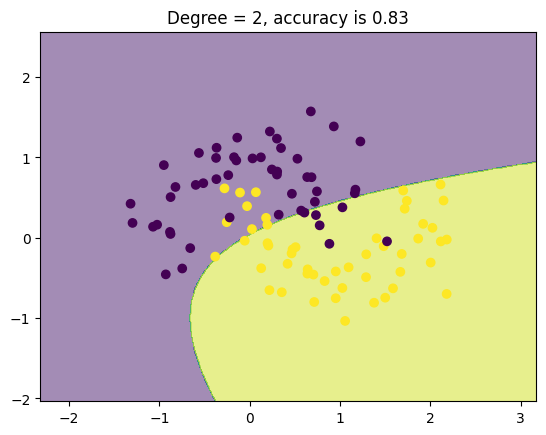

In [28]:
plot_decision_boundary(X,y,degree=2)

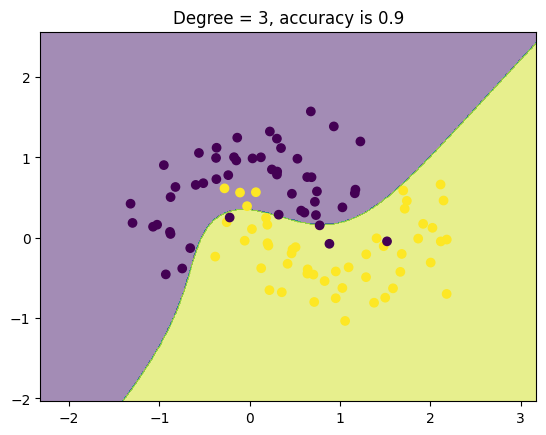

In [29]:
plot_decision_boundary(X,y,degree=3)